# Classifying with Real-World Examples

Classification: Classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. Examples of classification problems include: Given an example, classify if it is spam or not.

### The iris dataset

The Iris dataset is a classic dataset from the 1930s; it is one of the first modern examples of statistical classification.
The dataset is a collection of morphological measurements of several iris flowers. These measurements will enable us to distinguish multiple species of flower. Today, species are identified by their DNA fingerprints, but in the 1930s, DNA's role in genetics had not yet been
discovered.

The following four attributes of each plant were measured:
1)Sepal length
2)Sepal width
3)Petal length
4)Petal width

In general, we call the individual numeric measurements we use to describe our data features.
These features can be directly measured or computed from intermediate data.

# Loading iris data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
data =load_iris()
features =  data.data
features_names = data.feature_names
target = data.target
target_names = data.target_names
labels = target_names[target]

In [3]:
features_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

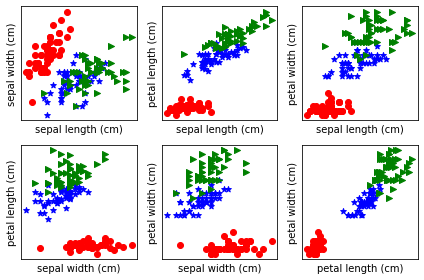

In [4]:
fig,axes = plt.subplots(2,3)
pairs =[(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)] #here is a list of tuples where in each tuples there are two values correpoding to each column in features
#Setup 3 different pairs of color and marker
color_marker=[
    ('r','o'),
    ('b','*'),
    ('g','>'),
]
for i,(p0,p1) in enumerate(pairs):
    ax=axes.flat[i]
    for t in range(3):
        c,marker =color_marker[t]
        ax.scatter(features[target==t,p0],features[target==t,p1],marker=marker,c=c)#here two feature with selected item is plotted against
        ax.set_xlabel(features_names[p0])
        ax.set_ylabel(features_names[p1])
        ax.set_xticks([])
        ax.set_yticks([])

fig.tight_layout()
    

# Building our first classification model

In [5]:
from sklearn import tree

In [6]:
tr = tree.DecisionTreeClassifier(min_samples_leaf=10)

In [7]:
tr.fit(features,labels)

DecisionTreeClassifier(min_samples_leaf=10)

In [8]:
import graphviz

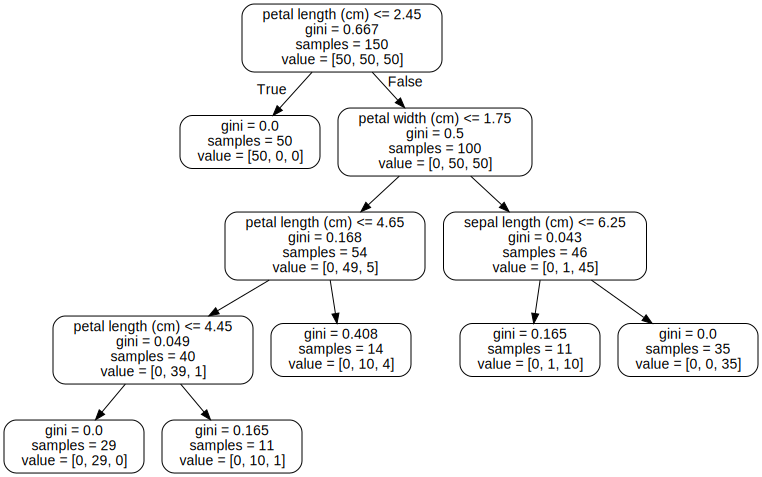

In [9]:
tree.export_graphviz(tr,feature_names=features_names,rounded=True,out_file='decision.dot')
graphviz.Source(open('decision.dot').read())

In [10]:
predection = tr.predict(features)
print("Accuracy :{:.1%}".format(np.mean(predection==labels)))

Accuracy :96.0%


In [11]:
predection

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor

In [12]:
predictions=[]
for i in range(len(features)):
    train_features = np.delete(features,i,axis=0)
    train_labels  = np.delete(labels,i,axis=0)
    tr.fit(train_features,train_labels)
    predictions.append(tr.predict([features[i]]))
predictions = np.array(predictions)

In [13]:
print("Accuracy (with LOO CV): {}".format(np.mean(predictions.ravel() == labels)))

Accuracy (with LOO CV): 0.9533333333333334


In [14]:
len(train_features)

149

In [15]:
from sklearn import model_selection 

#doing the same using sklearn

In [16]:
predictions = model_selection.cross_val_predict(tr,features,labels,cv=model_selection.LeaveOneOut())
print(np.mean(predictions==labels))

0.9533333333333334


In [17]:
a=np.array([0,1,2,3,4])

In [18]:
a

array([0, 1, 2, 3, 4])

In [19]:
b=np.delete(a,0,axis=0)

In [20]:
a

array([0, 1, 2, 3, 4])

In [21]:
b

array([1, 2, 3, 4])

# A more complex dataset and a more complex

## The seeds datasets

In [12]:
from load import load_data

In [13]:
features_name = [
    'area',
    'perimeter',
    'compactness',
    'length of kernel',
    'width of kernel',
    'asymmetry coefficient',
    'length of kernel groove'
    
]
data = load_data('seeds')
features = data['features']
target = data['target']

In [14]:
data

{'features': array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
        [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
        [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
        ...,
        [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
        [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
        [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]]),
 'target_names': ['Canadian', 'Kama', 'Rosa'],
 'target': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## KNN classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)#default gives 5 which is good choice bt for simpliocity to think about going for 1

In [26]:
kf = model_selection.KFold(n_splits=5,shuffle=False)
means=[]


In [27]:
for training,testing in kf.split(features):
   # We learn a model for this fold with `fit` and then apply it to the
   # testing data with `predict`:
   knn.fit(features[training], target[training])
   prediction = knn.predict(features[testing])
   # np.mean on an array of booleans returns fraction
 # of correct decisions for this fold:
   curmean = np.mean(prediction == target[testing])
   means.append(curmean)
print('Mean accuracy: {:.1%}'.format(np.mean(means)))


Mean accuracy: 83.8%


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [29]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = Pipeline([('norm', StandardScaler()), ('knn', classifier)])
mean=[]
for training,testing in kf.split(features):
    # We learn a model for this fold with `fit` and then apply it to the
    # testing data with `predict`:
    classifier.fit(features[training], target[training])
    prediction = classifier.predict(features[testing])

    # np.mean on an array of booleans returns fraction
    # of correct decisions for this fold:
    curmean = np.mean(prediction == target[testing])
    means.append(curmean)
print('Mean accuracy: {:.1%}'.format(np.mean(means)))

Mean accuracy: 85.2%


## Decision boundaries

In [30]:
from matplotlib.colors import ListedColormap

In [31]:
features[:,0]

array([15.26, 14.88, 14.29, 13.84, 16.14, 14.38, 14.69, 14.11, 16.63,
       16.44, 15.26, 14.03, 13.89, 13.78, 13.74, 14.59, 13.99, 15.69,
       14.7 , 12.72, 14.16, 14.11, 15.88, 12.08, 15.01, 16.19, 13.02,
       12.74, 14.11, 13.45, 13.16, 15.49, 14.09, 13.94, 15.05, 16.12,
       16.2 , 17.08, 14.8 , 14.28, 13.54, 13.5 , 13.16, 15.5 , 15.11,
       13.8 , 15.36, 14.99, 14.79, 14.86, 14.43, 15.78, 14.49, 14.33,
       14.52, 15.03, 14.46, 14.92, 15.38, 12.11, 11.42, 11.23, 12.36,
       13.22, 12.78, 12.88, 14.34, 14.01, 14.37, 12.73, 17.63, 16.84,
       17.26, 19.11, 16.82, 16.77, 17.32, 20.71, 18.94, 17.12, 16.53,
       18.72, 20.2 , 19.57, 19.51, 18.27, 18.88, 18.98, 21.18, 20.88,
       20.1 , 18.76, 18.81, 18.59, 18.36, 16.87, 19.31, 18.98, 18.17,
       18.72, 16.41, 17.99, 19.46, 19.18, 18.95, 18.83, 18.85, 17.63,
       19.94, 18.55, 18.45, 19.38, 19.13, 19.14, 20.97, 19.06, 18.96,
       19.15, 18.89, 20.03, 20.24, 18.14, 16.17, 18.43, 15.99, 18.75,
       18.65, 17.98,

In [32]:
def plot_decision_space(clf, features, target, use_color=True):
    from matplotlib.colors import ListedColormap

    clf.fit(features[:, [0,2]], target)

    y0, y1 = features[:, 2].min() * .9, features[:, 2].max() * 1.1
    x0, x1 = features[:, 0].min() * .9, features[:, 0].max() * 1.1
    X = np.linspace(x0, x1, 1000)
    Y = np.linspace(y0, y1, 1000)
    X, Y = np.meshgrid(X, Y)
    C = clf.predict(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape)
    #plotting decision boundries
    if use_color:
        cmap = ListedColormap([(1., .7, .7), (.7, 1., .7), (.7, .7, 1.)])
    else:
        cmap = ListedColormap([(1., 1., 1.), (.2, .2, .2), (.6, .6, .6)])

    fig,ax = plt.subplots()
    ax.scatter(features[:, 0], features[:, 2], c=target, cmap=cmap)
    for lab, ma in zip(range(3), "Do^"):
        ax.plot(features[target == lab, 0], features[
                 target == lab, 2], ma, c=(1., 1., 1.), ms=6)

    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    ax.set_xlabel(features_names[0])
    ax.set_ylabel(features_names[2])
    ax.pcolormesh(X, Y, C, cmap=cmap)
    return fig

In [33]:
features.shape

(210, 7)

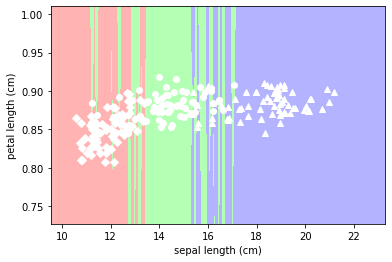

In [34]:
_ = plot_decision_space(knn,features,target)

#### Canadian examples are shown as diamonds  ,koma seeds as circles and rosa seeds as triangles

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#pipeling is done for normalization.After normalization every features is
#in the same unit(technically dimensionalless ) and we ca more confidently mix dimension
classifier = KNeighborsClassifier(n_neighbors=1)
classifier = Pipeline([('norm', StandardScaler()),
                       ('knn', classifier)])

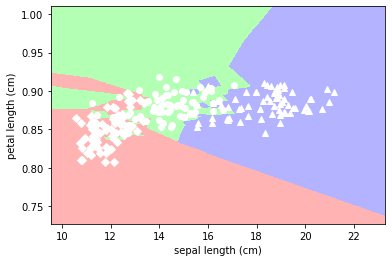

In [36]:
_ = plot_decision_space(classifier, features, target)

The boundaries are now different and you can see that both dimensions make a difference to the
outcome. In the full dataset, everything is happening on a seven-dimensional space, which is
very hard to visualize, but the same principle applies; while a few dimensions are dominant in
the original data, after normalization, they are all given the same importance.

## Random Forest Classifier 

In [37]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100)


In [38]:
#use cross-validatio to evaluate
predict = model_selection.cross_val_predict(rf,features,target)
print("RF accuracy: {:.1%}".format(np.mean(predict==target)))

RF accuracy: 88.1%


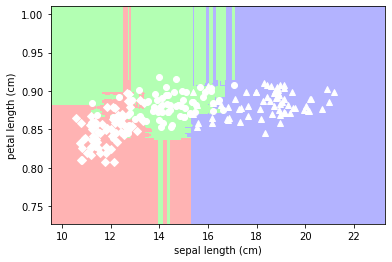

In [97]:
_=plot_decision_space(rf,features,target)

## Binary Classification

## Multiclass Classification